<h1 style='text-align: center'><strong>Linear regression</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Predicting house prices</strong></h2>

<h4 style='text-align: center'>Ames housing dataset</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#Linear-regression-model">Linear regression model</a></li>
        <li><a href="#Predictions">Predictions</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

It exists in two forms:

- Simple linear regression: It models the relationship between a single independent variable and a dependent variable by fitting a linear equation to observed data. One variable is explanatory, and the other is dependent.

- Multiple linear regression: It models the relationship between two or more independent variables and a dependent variable by fitting a linear equation to observed data. Each independent variable is explanatory, and the dependent variable is dependent.

The equation of a simple linear regression is:

$y = b_0 + b_1 \cdot x$

Where: 

- $y$ is the dependent variable.
- $b_0$ is the intercept.
- $b_1$ is the slope.
- $x$ is the independent variable.

The equation of a multiple linear regression is:

$y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + \ldots + b_n \cdot x_n$

Where:

- $y$ is the dependent variable.
- $b_0$ is the intercept.
- $b_1, b_2, \ldots, b_n$ are the slopes.
- $x_1, x_2, \ldots, x_n$ are the independent variables.

The goal of linear regression is to minimize the vertical distance between all the data points and the line. This distance is called the residual. The best fit line is the one that minimizes the sum of the squared residuals.

<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **LinearRegression from sklearn.linear_model**: To create and train the linear regression model.
- **fetch_openml from sklearn.datasets**: To fetch the Ames housing dataset.
- **matplotlib.pyplot**: For plotting the results.


<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>

The dataset we will use is the Ames housing dataset. It is a dataset that contains information about houses in Ames, Iowa. The dataset has 79 features and 1460 samples. The goal is to predict the price of a house based on its features.

In [2]:
# Load the Ames housing dataset
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.data
df['SalePrice'] = housing.target
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


- **fetch_openml(name="house_prices", as_frame=True)**: Fetches the Ames housing dataset from OpenML and loads it as a DataFrame.
- **housing.data**: Contains the features of the dataset.
- **housing.target**: Contains the target variable, which is the sale price of the houses.
- **df = housing.data**: Creates a DataFrame `df` containing the features.
- **df['SalePrice'] = housing.target**: Adds the target variable (`SalePrice`) to the DataFrame.


<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Select the features and target variable
X = df[['GrLivArea']]  # Using the above-ground living area as the feature
y = df['SalePrice']

### Features
- **X**: Contains above-ground living area as feature.
- **y**: Contains the sale price of the houses as the target variable.

<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **train_test_split(X, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.


<h2 style='text-align: center' id='Linear-regression-model'><strong>6. Linear regression model</strong></h2>

In [5]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- **model = LinearRegression()**: Initializes the linear regression model.
- **model.fit(X_train, y_train)**: Trains the model using the training data (`X_train` and `y_train`).


<h2 style='text-align: center' id='Predictions'><strong>7. Predictions</strong></h2>

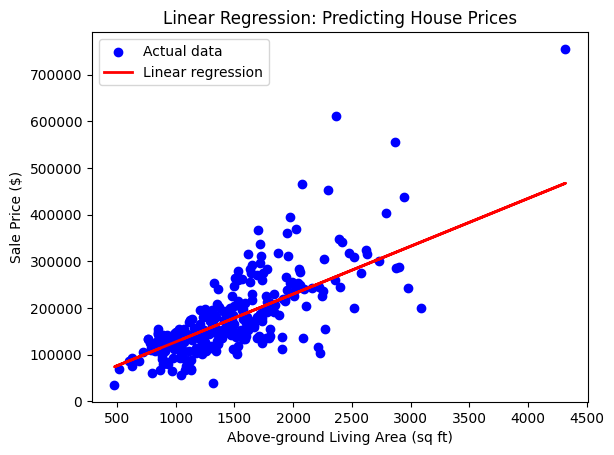

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression')
plt.xlabel('Above-ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.title('Linear Regression: Predicting House Prices')
plt.show()


- **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the testing data (`X_test`).

- **plt.scatter(X_test, y_test, color='blue', label='Actual data')**: Creates a scatter plot of the actual data (testing data) with 'GrLivArea' on the x-axis and 'SalePrice' on the y-axis. Points are colored blue.
- **plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression')**: Plots the linear regression line using the predicted values (`y_pred`) on the testing data (`X_test`). The line is colored red.
- **plt.xlabel('Above-ground Living Area (sq ft)')**: Sets the x-axis label.
- **plt.ylabel('Sale Price ($)')**: Sets the y-axis label.
- **plt.legend()**: Adds a legend to the plot.
- **plt.title('Linear Regression: Predicting House Prices')**: Sets the title of the plot.
- **plt.show()**: Displays the plot.


<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

In [7]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 38341.204476421066
Mean Squared Error (MSE): 3418946311.180807
R-squared (R²): 0.5542632452871117


- **Mean Absolute Error (MAE)**: Measures the average magnitude of the errors in the predictions, without considering their direction. It’s the average of the absolute differences between predicted and actual values.
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors. It’s the average squared difference between predicted and actual values.
- **R-squared (R²)**: Also known as the coefficient of determination, represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. It provides an indication of goodness of fit and a measure of how well unseen samples are likely to be predicted by the model.
